# AIRBNB PRICE FORECASTER BY KAREN BLANCO

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as mplot
%matplotlib inline 

In [4]:
import os
print(os.getcwd())

d:\AI Bootcamp Github\bnb_forecaster_ML\notebooks


El data sets presenta problemas de lectura por lo que para evitar esto chequeamos si hay extra commas, espacios indeseados dentro de celdas, quotes sin cerrar,etc. Podemos aplicar un sep o delimiter=';'

In [6]:

bnb_data = pd.read_csv("./data/airbnb-listings-extract.csv",sep=';', decimal='.')
print("bnb_data Shape:", bnb_data .shape)
pd.set_option('display.max_columns', None)
bnb_data .head()



bnb_data Shape: (14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [7]:
print("Columns in the DataFrame:")
print(bnb_data .columns)


Columns in the DataFrame:
Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'We

## 1. Análisis previo a preparación de datos

Vamos a conocer un poco la data y sus tipos. Nos muestra que hay 14780 entradas y 89 columnas.

In [8]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

bnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              14780 non-null  int64  
 1   Listing Url                     14780 non-null  object 
 2   Scrape ID                       14780 non-null  int64  
 3   Last Scraped                    14780 non-null  object 
 4   Name                            14779 non-null  object 
 5   Summary                         14189 non-null  object 
 6   Space                           10888 non-null  object 
 7   Description                     14774 non-null  object 
 8   Experiences Offered             14780 non-null  object 
 9   Neighborhood Overview           9134 non-null   object 
 10  Notes                           5644 non-null   object 
 11  Transit                         9066 non-null   object 
 12  Access                          

In [9]:
#Hacemos un .describe para hacer una analisis rapido de la distribucion central y tendencias.

bnb_data.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,376.937883,1426.125246,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,8.954736,22.996211,39.869621,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,195.701043,1246.403853,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,9.333252,19.731371,29.621456,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,215.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,500.000000,1725.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [10]:
#Chequeamos si hay nulls para indentificarlos.

bnb_data.isnull().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             591
Space                              3892
Description                           6
Experiences Offered                   0
Neighborhood Overview              5646
Notes                              9136
Transit                            5714
Access                             6462
Interaction                        6554
House Rules                        5161
Thumbnail Url                      2820
Medium Url                         2820
Picture Url                          19
XL Picture Url                     2820
Host ID                               0
Host URL                              0
Host Name                             3
Host Since                            3
Host Location                        43
Host About                         5241


### *Eliminamos features que no seran relevantes para el label precio desde un inicio:*


❌**ID, Listing Url, Scrape ID, Host ID, Host URL, Picture URLs, Thumbnail URLs.:** son identificadores únicos y no aportan valor al modelo. No tienen ninguna relación directa con el precio del Airbnb.

❌**Last Scraped, Calendar Last Scraped, Host Since:** Estas son fechas relacionadas con el scraping o actividad temporal que no contribuyen directamente a la predicción del precio.

❌**Host Name, Host Thumbnail Url, Host Picture Url:** Información del host que no es relevante para determinar el precio de la propiedad.

❌**Name, Space, Description, Neighborhood Overview, Notes, Transit, Access, Interaction, House Rules:** Estas columnas son principalmente textuales, utiliaremos NLP con las mas relevantes en la predicción del precio como summary y description.

❌**Experiences Offered:** Esta columna tiene muy poco valor porque el campo parece ser estático en la mayoría de los casos.

❌**Medium Url, XL Picture Url, Features:** No contribuyen a la predicción de precios.

❌**Host About:** Esta columna es información descriptiva del host, sin influencia directa en el precio.

❌**Host Response Time, Host Response Rate, Host Acceptance Rate:** Aunque podrían ser relevantes para la satisfacción del cliente, la influencia en el precio es indirecta y no fundamental para una primera aproximación.

❌**License, Jurisdiction Names:** Información de licencias locales que no tiene impacto en el precio.

❌**Calendar Updated:** Información sobre cuándo se actualizó el calendario que no tiene impacto directo en el precio.

❌**Has Availability:** Esta columna tiene muy pocos datos completos (solo 12 no nulos), por lo que no aporta al modelo.

❌**Geolocation:** ya tenemos columna de latitude y longitude, evitamos redundancia

❌**Thumbnail Url, Medium Url, XL Picture Url, Picture Url:** Enlaces a imágenes que no contribuyen a la predicción.

❌**Calculated host listings count, Host Listings Count:** tienen bastante correlacion con Total Host listings count, eliminamos 2 para evitar multicolinealidad.

In [13]:
# Features a eliminar
columns_to_drop = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Space', 'Experiences Offered',
    'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules', 'Thumbnail Url', 
    'Medium Url', 'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
    'Host About', 'Host Response Time', 'Host Response Rate', 'Host Acceptance Rate', 'Host Thumbnail Url',
    'Host Picture Url', 'Calendar Updated', 'Has Availability', 'Geolocation', 'License', 'Jurisdiction Names', 'Features','Host Neighbourhood',
    'Calculated host listings count','Host Listings Count','Calendar last Scraped','Host Verifications'
]

bnb_data_cleaned = bnb_data.drop(columns=columns_to_drop)


In [14]:
# Imprimir cada columna 
for column in sorted(bnb_data_cleaned.columns):
    print(column)


Accommodates
Amenities
Availability 30
Availability 365
Availability 60
Availability 90
Bathrooms
Bed Type
Bedrooms
Beds
Cancellation Policy
City
Cleaning Fee
Country
Country Code
Description
Extra People
First Review
Guests Included
Host Total Listings Count
Last Review
Latitude
Longitude
Market
Maximum Nights
Minimum Nights
Monthly Price
Neighbourhood
Neighbourhood Cleansed
Neighbourhood Group Cleansed
Number of Reviews
Price
Property Type
Review Scores Accuracy
Review Scores Checkin
Review Scores Cleanliness
Review Scores Communication
Review Scores Location
Review Scores Rating
Review Scores Value
Reviews per Month
Room Type
Security Deposit
Smart Location
Square Feet
State
Street
Summary
Weekly Price
Zipcode


In [15]:
bnb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 50 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Summary                       14189 non-null  object 
 1   Description                   14774 non-null  object 
 2   Host Total Listings Count     14777 non-null  float64
 3   Street                        14780 non-null  object 
 4   Neighbourhood                 9551 non-null   object 
 5   Neighbourhood Cleansed        14780 non-null  object 
 6   Neighbourhood Group Cleansed  13760 non-null  object 
 7   City                          14774 non-null  object 
 8   State                         14636 non-null  object 
 9   Zipcode                       14274 non-null  object 
 10  Market                        14723 non-null  object 
 11  Smart Location                14780 non-null  object 
 12  Country Code                  14780 non-null  object 
 13  C

In [16]:
# Ver los tipos únicos de amenities presentes en el dataset
unique_amenities = bnb_data['Amenities'].str.split(',', expand=True).stack().str.strip().unique()
unique_amenities


array(['TV', 'Cable TV', 'Internet', 'Wireless Internet',
       'Air conditioning', 'Pool', 'Free parking on premises', 'Heating',
       'Family/kid friendly', 'Smoke detector',
       'Carbon monoxide detector', 'Fire extinguisher', 'Essentials',
       'Shampoo', 'Lock on bedroom door', '24-hour check-in', 'Hangers',
       'Hair dryer', 'Iron', 'Laptop friendly workspace', 'Self Check-In',
       'Doorman Entry', 'Private entrance', 'Elevator in building',
       'Washer', 'Wheelchair accessible', 'Kitchen', 'Doorman',
       'Breakfast', 'Buzzer/wireless intercom', 'Lockbox', 'Safety card',
       'Smoking allowed', 'First aid kit', 'Indoor fireplace', 'Dryer',
       'translation missing: en.hosting_amenity_49',
       'translation missing: en.hosting_amenity_50', 'Hot tub',
       'Pets allowed', 'Keypad', 'Private living room',
       'Pets live on this property', 'Cat(s)', 'Dog(s)',
       'Suitable for events', 'Smartlock', 'Gym',
       'Free parking on street', 'Other pet(

In [17]:
#clasificamos amenities en tres categorías (Básicos, Estándar, Alto Valor) de manera más sistemática y que sea mas facil clasificar mas adelante. Hay 2 errores de transalation en amenities que podemos borrar por que no aportan.

high_value_amenities = [
    'Pool', 'Hot tub', 'Gym', 'Indoor fireplace', 'BBQ grill', 'EV charger', 'Doorman', 'Private entrance', 
    'Elevator in building', 'Suitable for events', 'Jacuzzi', 'Smartlock', 'Free parking on premises', 'Fireplace guards'
]
standard_value_amenities = [
    'Air conditioning', 'Heating', 'Washer / Dryer', 'Dishwasher', 'Microwave', 'Coffee maker',
    'Refrigerator', 'Cooking basics', 'Oven', 'Laptop Friendly Workspace', 'Iron', 'Hair Dryer',
    'Self Check-In', 'Doorman Entry', 'Private living room', 'Crib', 'Bathtub', 'Breakfast',
    'Pets allowed', 'Pets live on this property', 'Cat(s)', 'Dog(s)', 'Other pet(s)', 
    'Baby bath', 'High chair', 'Children’s books and toys', 'Table corner guards', 'Stair gates', 
    'Children’s dinnerware', 'Pack ’n Play/travel crib', 'Babysitter recommendations', 'Changing table', 
    'Wheelchair Accessible', 'Room-darkening shades', 'Long term stays allowed', 'Keypad', 'Pets Allowed', 'Smoking Allowed'
]
basic_amenities = [
    'Wifi', 'Cable TV', 'Internet', 'Smoke Detector', 'Carbon Monoxide Detector', 'First Aid Kit', 
    'Fire Extinguisher', '24-Hour Check-in', 'Safety Card', 'Window guards', 'Luggage dropoff allowed', 
    'Buzzer/Wireless Intercom', 'Wireless Internet', 'Lock on Bedroom Door', 'Game console', 
    'Dishes and silverware', 'Path to entrance lit at night', 'Outlet covers', 'Buzzer/wireless intercom'
]

# Eliminar los amenities con problemas de traducción del conjunto de amenities
classified_amenities = set(high_value_amenities + standard_value_amenities + basic_amenities)
classified_amenities.discard('translation missing: en.hosting_amenity_49')
classified_amenities.discard('translation missing: en.hosting_amenity_50')

# Crear nuevas columnas que cuenten la cantidad de amenities en cada categoría
def count_amenities(amenities, category):
    return sum(amenity.strip() in amenities for amenity in category) if pd.notna(amenities) else 0

bnb_data_cleaned['High Value Amenities'] = bnb_data['Amenities'].apply(lambda x: count_amenities(x, high_value_amenities))
bnb_data_cleaned['Standard Value Amenities'] = bnb_data['Amenities'].apply(lambda x: count_amenities(x, standard_value_amenities))
bnb_data_cleaned['Basic Amenities'] = bnb_data['Amenities'].apply(lambda x: count_amenities(x, basic_amenities))

# Eliminamos la columna 'Amenities' ya que hemos creado nuevas características representativas
bnb_data_cleaned = bnb_data_cleaned.drop(columns=['Amenities'])

In [18]:
#Procesamiento de summary y description
#Añadimos leng de los textos como métrica indicativa.
#Mantenemos summary y description para un análisis más profundo con técnicas de NLP despues de la division.

bnb_data_cleaned['Summary_Length'] = bnb_data_cleaned['Summary'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)
bnb_data_cleaned['Description_Length'] = bnb_data_cleaned['Description'].apply(lambda x: len(x.split()) if pd.notna(x) else 0)

In [19]:
import datetime

# Procesar fechas de 'First Review' y 'Last Review'
bnb_data_cleaned['First Review'] = pd.to_datetime(bnb_data['First Review'], errors='coerce')
bnb_data_cleaned['Last Review'] = pd.to_datetime(bnb_data['Last Review'], errors='coerce')

# Calcular el número de días desde la primera y la última reseña hasta hoy
today = datetime.datetime.now()
bnb_data_cleaned['Days Since First Review'] = (today - bnb_data_cleaned['First Review']).dt.days
bnb_data_cleaned['Days Since Last Review'] = (today - bnb_data_cleaned['Last Review']).dt.days

# Eliminar las columnas originales de fecha ya que se han extraído las métricas
bnb_data_cleaned = bnb_data_cleaned.drop(columns=['First Review', 'Last Review'])

In [20]:
#Ahora hagamos un get dummies con las categorias textuales que podemos y tienen baja cardinalidad:

# Verificar el número de valores únicos para cada una de las columnas categóricas antes de aplicar pd.get_dummies()
unique_values_room_type = bnb_data_cleaned['Room Type'].nunique()
unique_values_bed_type = bnb_data_cleaned['Bed Type'].nunique()

# Mostrar el número de valores únicos en cada columna categórica
unique_values_room_type, unique_values_bed_type



(3, 5)

In [21]:
# Mostrar las categorías únicas de 'Room Type' y 'Bed Type' en el dataset original
unique_room_type = bnb_data_cleaned['Room Type'].unique()
unique_bed_type = bnb_data_cleaned['Bed Type'].unique()

(unique_room_type, unique_bed_type)


(array(['Entire home/apt', 'Private room', 'Shared room'], dtype=object),
 array(['Real Bed', 'Pull-out Sofa', 'Futon', 'Couch', 'Airbed'],
       dtype=object))

In [22]:
# Aplicar pd.get_dummies() a las columnas 'Room Type' y 'Bed Type' en el dataset limpio
bnb_data_cleaned = pd.get_dummies(bnb_data_cleaned, columns=['Room Type', 'Bed Type'], drop_first=True)

# Mostrar las columnas del dataset después de aplicar get_dummies
bnb_data_cleaned.columns


Index(['Summary', 'Description', 'Host Total Listings Count', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Square Feet', 'Price', 'Weekly Price', 'Monthly Price',
       'Security Deposit', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 30',
       'Availability 60', 'Availability 90', 'Availability 365',
       'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy',
       'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location',
       'Review Scores Value', 'Cancellation Policy', 'Reviews per Month',
       'High Value Amenities', 'Standard Value Amenities', 'Basic Amenities',
       'Summary_Length', 'D

In [23]:
# Mostrar las categorías únicas de 'Property Type' tiene 22 cateogrias por lo que hacer get dummies impilcarias muchas columnas mas. Este analisis se hace depues.
unique_property_type_cleaned = bnb_data_cleaned['Property Type'].unique()

# Mostrar las categorías únicas
unique_property_type_cleaned


array(['Loft', 'Apartment', 'House', 'Condominium', 'Camper/RV', 'Other',
       'Dorm', 'Bed & Breakfast', 'Tent', 'Boat', 'Guesthouse', 'Villa',
       'Hostel', 'Townhouse', 'Chalet', 'Serviced apartment', 'Bungalow',
       'Boutique hotel', 'Guest suite', 'Casa particular', 'Timeshare',
       'Earth House'], dtype=object)

In [24]:
#Para limpieza mas profunda antes de dividir datos podemos asegurarnos de convertir todo a minúsculas, evitar espacio y caracteres especiales.
import re

# Convertir los nombres de las columnas a minúsculas y eliminar caracteres especiales
bnb_data_cleaned.columns = bnb_data_cleaned.columns.str.lower().str.strip().str.replace(r'\s+', '_', regex=True).str.replace(r'[^a-z0-9_]', '', regex=True)

# Convertir los valores de las celdas a minúsculas, eliminar caracteres especiales y espacios adicionales
bnb_data_cleaned = bnb_data_cleaned.apply(lambda x: x.str.lower().str.strip().apply(lambda y: re.sub(r'[^a-z0-9\s]', '', y) if pd.notna(y) else y) if x.dtype == "object" else x)


bnb_data_cleaned.head(20)


,summary,description,host_total_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,property_type,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,cancellation_policy,reviews_per_month,high_value_amenities,standard_value_amenities,basic_amenities,summary_length,description_length,days_since_first_review,days_since_last_review,room_type_private_room,room_type_shared_room,bed_type_couch,bed_type_futon,bed_type_pullout_sofa,bed_type_real_bed
0,loft in the hill country 1215 minutes directly...,loft in the hill country 1215 minutes directly...,1.0,canyon edge drive austin tx 78733 united states,NaN,78733,NaN,austin,tx,78733,austin,austin tx,us,united states,30.337361,-97.863277,loft,2,1.0,1.0,1.0,NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,10,34,64,281,42,98.0,10.0,10.0,10.0,10.0,10.0,10.0,moderate,3.50,4,5,3,39,185,3143.0,2793.0,False,False,False,False,False,True
1,this apartment has 1 double bed 1 double sofa ...,this apartment has 1 double bed 1 double sofa ...,162.0,barcelona barcelona 08010 spain,NaN,la dreta de leixample,eixample,barcelona,barcelona,08010,barcelona,barcelona spain,es,spain,41.389683,2.172625,apartment,4,1.0,1.0,1.0,NaN,70.0,NaN,NaN,200.0,40.0,2,44,1,1125,6,21,39,309,1,80.0,8.0,10.0,10.0,10.0,8.0,10.0,superstrict30,0.86,1,3,2,68,172,2786.0,2786.0,False,False,False,False,False,True
2,this apartment has 1 double bed 1 double sofa ...,this apartment has 1 double bed 1 double sofa ...,162.0,barcelona barcelona 08008 spain,NaN,la dreta de leixample,eixample,barcelona,barcelona,08008,barcelona,barcelona spain,es,spain,41.393035,2.162173,apartment,4,1.0,1.0,1.0,NaN,70.0,NaN,NaN,200.0,60.0,2,42,1,1125,7,21,42,291,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,superstrict30,NaN,1,3,2,59,169,NaN,NaN,False,False,False,False,False,True
3,live like a local in barcelonas most chic dist...,live like a local in barcelonas most chic dist...,27.0,barcelona barcelona 08009 spain,NaN,la dreta de leixample,eixample,barcelona,barcelona,08009,barcelona,barcelona spain,es,spain,41.396967,2.167418,apartment,8,2.0,3.0,4.0,NaN,229.0,NaN,NaN,250.0,79.0,2,39,2,1125,11,24,47,316,13,92.0,10.0,9.0,10.0,10.0,10.0,9.0,strict,1.09,2,5,3,50,166,3108.0,2789.0,False,False,False,False,False,True
4,unique apartment in vibrant neighborhoods care...,unique apartment in vibrant neighborhoods care...,207.0,lantiga esquerra de leixample barcelona catalu...,lantiga esquerra de leixample,lantiga esquerra de leixample,eixample,barcelona,catalunya,08036,barcelona,barcelona spain,es,spain,41.388685,2.155150,apartment,5,1.0,2.0,2.0,NaN,149.0,NaN,NaN,NaN,55.0,1,0,2,1125,0,0,0,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,flexible,NaN,1,2,2,41,131,NaN,NaN,False,False,False,False,False,True
5,unique apartment in vibrant neighborhoods care...,unique apartment in vibrant neighborhoods care...,207.0,la nova esquerra de leixample barcelona catalu...,la nova esquerra de leixample,la nova esquerra de leixample,eixample,barcelona,catalunya,08015,barcelona,barcelona spain,es,spain,41.382537,2.149577,apartment,6,1.0,2.0,3.0,NaN,106.0,NaN,NaN,NaN,NaN,1,0,2,1125,0,2,2,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,strict,NaN,1,2,2,41,176,NaN,NaN,False,False,False,False,False,True
6,spacious and quiet apartment that can accommod...,spacious and quiet apartment that can accommod...,2.0,el fort pienc barcelona catalonia 08013 spain,el fort pienc,el fort pienc,eixample,barcelona,catalonia,08013,barcelona,barcelona spain,es,spain,41.399058,2.184229,apartment,5,2.0,3.0,4.0,NaN,52.0,NaN,NaN,300.0,60.0,4,25,3,365,4,11,23,280,43,90.0,9.0,9.0,10.0,10.0,9.0,9.

In [25]:
bnb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   summary                       14189 non-null  object 
 1   description                   14774 non-null  object 
 2   host_total_listings_count     14777 non-null  float64
 3   street                        14780 non-null  object 
 4   neighbourhood                 9551 non-null   object 
 5   neighbourhood_cleansed        14780 non-null  object 
 6   neighbourhood_group_cleansed  13760 non-null  object 
 7   city                          14774 non-null  object 
 8   state                         14636 non-null  object 
 9   zipcode                       14274 non-null  object 
 10  market                        14723 non-null  object 
 11  smart_location                14780 non-null  object 
 12  country_code                  14780 non-null  object 
 13  c

### *Chequeamos distribucion y posibles Outliers gráficamente*
La gráfica muestra un sesgo completamente a la derecha, donde hay precios muy altos y la mayoria de precios se encuentran concentrados cerca a 0.

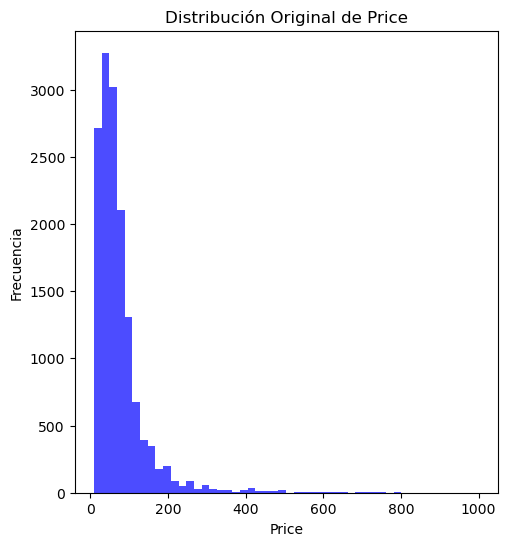

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que la columna 'price' sea numérica
bnb_data['Price'] = pd.to_numeric(bnb_data['Price'], errors='coerce')

# Crear un histograma para los valores ORIGINALES de 'price'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bnb_data['Price'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribución Original de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

plt.show()


In [31]:
# Aplicar la transformación logarítmica a la columna 'price' para reducir el impacto de outliers que se ven en el plot y mejorar la distribución de datos. Price tiene muchos valores extremos y esto ayudara a reducir su impacto.
bnb_data_cleaned['price'] = np.log1p(bnb_data_cleaned['price'])

In [32]:
# Guardar el dataset limpio
bnb_data_cleaned.to_csv('./data/airbnb-listings-cleaned.csv', index=False)


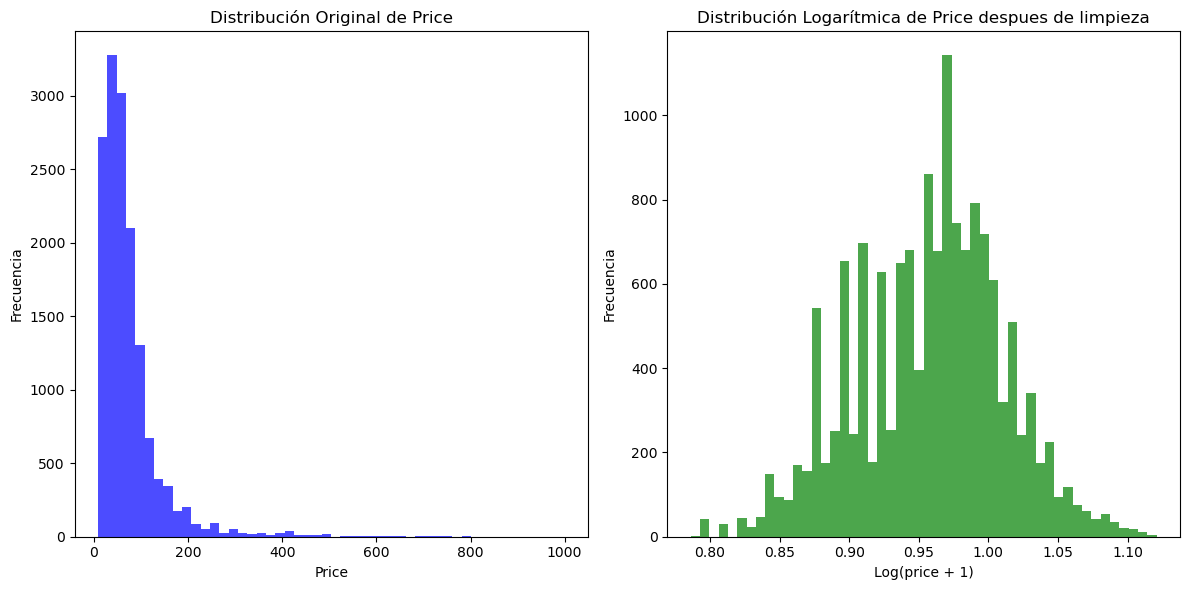

In [33]:

# Asegúro que la columna 'price' sea numérica
bnb_data['Price'] = pd.to_numeric(bnb_data['Price'], errors='coerce')

# Creo un histograma para los valores originales de 'Price'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(bnb_data['Price'].dropna(), bins=50, color='blue', alpha=0.7)
plt.title('Distribución Original de Price')
plt.xlabel('Price')
plt.ylabel('Frecuencia')

# Aplico la transformación logarítmica
bnb_data_cleaned = pd.read_csv("./data/airbnb-listings-cleaned.csv")
bnb_data_cleaned['price'] = np.log1p(bnb_data_cleaned['price'])

# Creo un histograma para los valores transformados de 'price'
plt.subplot(1, 2, 2)
plt.hist(bnb_data_cleaned['price'].dropna(), bins=50, color='green', alpha=0.7)
plt.title('Distribución Logarítmica de Price despues de limpieza')
plt.xlabel('Log(price + 1)')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [34]:
bnb_data_cleaned.shape

(14780, 58)

In [35]:
bnb_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14780 entries, 0 to 14779
Data columns (total 58 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   summary                       14183 non-null  object 
 1   description                   14773 non-null  object 
 2   host_total_listings_count     14777 non-null  float64
 3   street                        14780 non-null  object 
 4   neighbourhood                 9551 non-null   object 
 5   neighbourhood_cleansed        14779 non-null  object 
 6   neighbourhood_group_cleansed  13760 non-null  object 
 7   city                          14720 non-null  object 
 8   state                         14581 non-null  object 
 9   zipcode                       14273 non-null  object 
 10  market                        14723 non-null  object 
 11  smart_location                14780 non-null  object 
 12  country_code                  14780 non-null  object 
 13  c

La transformacion logaritmica a logrado reducir la asimetria de la distribucion y luce un poco mas normal.

In [36]:
# Guardar el dataset limpio antes de dividir
bnb_data_cleaned.to_csv('./data/airbnb-listings-cleaned.csv', index=False)


## 1. Carga de datos y división train/test después de análisis previo


In [38]:
#Lo haré con método train_test_split

from sklearn.model_selection import train_test_split

cleaned_df = pd.read_csv("./data/airbnb-listings-cleaned.csv")
train, test = train_test_split(cleaned_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardar
train.to_csv('./data/airbnb-listings-cleaned_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./data/airbnb-listings-cleaned_test.csv', sep=';', decimal='.', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df_bnb = pd.read_csv('./data/airbnb-listings-cleaned_train.csv', sep=';', decimal='.')
df_bnb.head().T


Dimensiones del dataset de training: (11824, 58)
Dimensiones del dataset de test: (2956, 58)


,0,1,2,3,4
summary,piso recin reformado cmoda habitacin con bao s...,lugares de inters plaza mayor plaza del sol me...,la casa tiene 5 habitaciones 180m2 totalmente...,this stunning and amazig room is covered with ...,NaN
description,piso recin reformado cmoda habitacin con bao s...,lugares de inters plaza mayor plaza del sol me...,la casa tiene 5 habitaciones 180m2 totalmente...,this stunning and amazig room is covered with ...,we are a young couple david spain and ana colo...
host_total_listings_count,2.0,1.0,16.0,114.0,2.0
street,jernimos madrid comunidad de madrid 28014 spain,madrid comunidad de madrid 28012 spain,carabanchel madrid comunidad de madrid 28025 s...,madrid comunidad de madrid 28012 spain,gaztambide madrid 28 28015 spain
neighbourhood,jernimos,NaN,carabanchel,NaN,gaztambide
neighbourhood_cleansed,jernimos,sol,vista alegre,embajadores,gaztambide
neighbourhood_group_cleansed,retiro,centro,carabanchel,centro,chamber
city,madrid,madrid,madrid,madrid,madrid
state,comunidad de madrid,comunidad de madrid,comunidad de madrid,comunidad de madrid,28
zipcode,28014,28012,28025,28012,28015


## 2. Análisis exploratorio

In [39]:

df_bnb.describe()

,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,high_value_amenities,standard_value_amenities,basic_amenities,summary_length,description_length,days_since_first_review,days_since_last_review
count,11821.000000,11824.000000,11824.000000,11824.000000,11780.000000,11804.00000,11787.000000,474.000000,11809.000000,2881.000000,2869.000000,5052.000000,6974.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9163.000000,9143.000000,9148.000000,9136.000000,9147.000000,9133.000000,9132.000000,9285.000000,11824.000000,11824.000000,11824.000000,11824.000000,11824.000000,9285.000000,9284.000000
mean,12.754420,40.491628,-3.776863,3.277486,1.285229,1.34429,2.049122,396.489451,0.957669,378.437348,1432.390728,189.312154,32.073129,1.581614,7.637601,3.109946,961.732070,8.949002,22.949256,39.803958,202.217185,22.664834,91.628179,9.410040,9.320726,9.623905,9.647863,9.534655,9.211345,1.873326,1.084235,2.519283,2.461265,45.486637,127.523427,3266.806354,2856.802994
std,34.578895,4.701030,14.014695,2.093973,0.664691,0.90518,1.623489,671.125823,0.052914,194.751472,1236.992934,116.011858,31.278032,1.160518,12.373491,13.427477,9387.640642,9.340334,19.762734,29.663314,128.006830,38.092338,9.137614,0.938013,1.004472,0.804050,0.765450,0.770421,0.963131,1.869157,1.031849,1.252237,0.849211,23.049135,56.255313,430.676071,168.108817
min,0.000000,-37.851182,-123.124429,1.000000,0.000000,0.00000,1.000000,0.000000,0.786048,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,2724.000000,2688.000000
25%,1.000000,40.409758,-3.707538,2.000000,1.000000,1.00000,1.000000,0.000000,0.922790,220.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,11.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.450000,0.000000,2.000000,2.000000,33.000000,76.000000,2942.000000,2762.000000
50%,2.000000,40.419331,-3.700763,3.000000,1.000000,1.00000,2.000000,90.000000,0.961071,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,240.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,1.210000,1.000000,3.000000,2.000000,42.000000,159.000000,3143.000000,2784.000000
75%,6.000000,40.430778,-3.683917,4.000000,1.000000,2.00000,2.000000,624.000000,0.993481,500.000000,1750.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.780000,2.000000,3.000000,3.000000,59.000000,171.000000,3463.000000,2884.000000
max,519.000000,55.966912,153.371427,16.000000,8.000000,10.00000,16.000000,6997.000000,1.119716,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,356.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,17.210000,8.000000,13.000000,9.000000,184.000000,215.000000,5269.000000,4460.000000


In [40]:
# Shape del conjunto train
df_bnb.shape

(11824, 58)

In [41]:
#Tenemos varias cateogrias con valores ausentes, se debe imputar.
df_bnb.isnull().sum()


summary                           475
description                         7
host_total_listings_count           3
street                              0
neighbourhood                    4159
neighbourhood_cleansed              1
neighbourhood_group_cleansed      818
city                               49
state                             165
zipcode                           399
market                             44
smart_location                      0
country_code                        0
country                             1
latitude                            0
longitude                           0
property_type                       0
accommodates                        0
bathrooms                          44
bedrooms                           20
beds                               37
square_feet                     11350
price                              15
weekly_price                     8943
monthly_price                    8955
security_deposit                 6772
cleaning_fee

### *Tratando valores Nulos*
**Columnas con más del 50% de valores nulos:**

square_feet (11,350 nulos), weekly_price (8,943 nulos), monthly_price (8,955 nulos), security_deposit (6,772 nulos), y cleaning_fee (4,850 nulos).
square_feet: imputar la mediana agrupando por property_type y bedrooms para obtener un valor más representativo.
weekly_price y monthly_price: imputar utilizando el precio diario (price) multiplicado por 7 o 30, respectivamente.
security_deposit y cleaning_fee: imputar la mediana agrupando por property_type. Para valores que aún estén nulos después, imputar con la mediana general.

**Columnas con Menos Valores Nulos:**

Por ejemplo, bathrooms (44 nulos), bedrooms (20 nulos), beds (37 nulos), price (15 nulos).
Para columnas numéricas con pocos valores nulos, se puede imputar con la mediana, ya que ayuda a mitigar el efecto de valores atípicos.
Para columnas categóricas como neighbourhood_cleansed (1 nulo), country (1 nulo), y city (49 nulos), se puede imputar con la moda (el valor más frecuente).


In [42]:
# Imputación basada en la mediana agrupada por características relevantes
# Imputar 'square_feet' utilizando la mediana por tipo de propiedad y número de habitaciones
df_bnb['square_feet'] = df_bnb.groupby(['property_type', 'bedrooms'])['square_feet'].transform(lambda x: x.fillna(x.median()))

# Imputar 'weekly_price' y 'monthly_price' basado en el precio diario si faltan
df_bnb['weekly_price'] = df_bnb['weekly_price'].fillna(df_bnb['price'] * 7)
df_bnb['monthly_price'] = df_bnb['monthly_price'].fillna(df_bnb['price'] * 30)

# Imputar cualquier valor restante de 'price', 'weekly_price', y 'monthly_price' con la mediana
df_bnb['price'] = df_bnb['price'].fillna(df_bnb['price'].median())
df_bnb['weekly_price'] = df_bnb['weekly_price'].fillna(df_bnb['weekly_price'].median())
df_bnb['monthly_price'] = df_bnb['monthly_price'].fillna(df_bnb['monthly_price'].median())

# Imputar 'security_deposit' y 'cleaning_fee' usando la mediana de propiedades similares
df_bnb['security_deposit'] = df_bnb.groupby('property_type')['security_deposit'].transform(lambda x: x.fillna(x.median()))
df_bnb['cleaning_fee'] = df_bnb.groupby('property_type')['cleaning_fee'].transform(lambda x: x.fillna(x.median()))

# Para cualquier valor que aún esté vacío después de la imputación grupal, imputar con la mediana general
cols_to_impute_with_median = ['square_feet', 'security_deposit', 'cleaning_fee']
for col in cols_to_impute_with_median:
    df_bnb[col] = df_bnb[col].fillna(df_bnb[col].median())

**Variables Relacionadas con Reviews:**

Muchas de las columnas de reseñas (review_scores_*) y reviews_per_month tienen varios valores nulos.
Imputar estos valores con 0 si el hecho de que no haya reseñas es representativo de que no han recibido ninguna (es decir, falta de reseñas = sin reseñas). Pero haremos primero comprobacion con mas columnas de reviews para saber si es cierto que un nulll es indicacion de falta de reseña.

**Dependencia entre las Reseñas:**

Verificamos si las filas que tienen valores nulos en review_scores_* también tienen valores nulos en number_of_reviews o reviews_per_month.
Si number_of_reviews es igual a cero y las columnas de review_scores_* tienen nulos, es una indicación de que no hay reseñas, y los valores nulos en las puntuaciones probablemente se deban a la falta de reviews.

**Agrupar las Propiedades con Valores Nulos en las Reseñas:**

Agrupa los valores nulos en las columnas de reseñas para verificar si tienen características comunes, como que number_of_reviews o days_since_last_review son cero o nulos.

In [43]:
# Verificar si los valores nulos en review_scores_* se deben a la falta de reseñas
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

# Comparar los nulos en las columnas de reviews con el número de reseñas
nulos_reviews = df_bnb[review_cols].isnull().sum()
sin_resenas = df_bnb[df_bnb['number_of_reviews'] == 0][review_cols].isnull().sum()

print("Valores nulos en las columnas de reviews:\n", nulos_reviews)
print("Valores nulos en las columnas de reviews cuando 'number_of_reviews' es 0:\n", sin_resenas)

# Analizar si las columnas reviews son nulas cuando no hay reseñas
propiedades_sin_resena = df_bnb[df_bnb['number_of_reviews'] == 0]
print("Total de propiedades sin reseña:", len(propiedades_sin_resena))
print("Valores nulos en las columnas de reviews para propiedades sin reseñas:\n", propiedades_sin_resena[review_cols].isnull().sum())


Valores nulos en las columnas de reviews:
 review_scores_rating           2661
review_scores_accuracy         2681
review_scores_cleanliness      2676
review_scores_checkin          2688
review_scores_communication    2677
review_scores_location         2691
review_scores_value            2692
reviews_per_month              2539
dtype: int64
Valores nulos en las columnas de reviews cuando 'number_of_reviews' es 0:
 review_scores_rating           2539
review_scores_accuracy         2539
review_scores_cleanliness      2539
review_scores_checkin          2539
review_scores_communication    2539
review_scores_location         2539
review_scores_value            2539
reviews_per_month              2539
dtype: int64
Total de propiedades sin reseña: 2539
Valores nulos en las columnas de reviews para propiedades sin reseñas:
 review_scores_rating           2539
review_scores_accuracy         2539
review_scores_cleanliness      2539
review_scores_checkin          2539
review_scores_communicatio

**Total de Propiedades sin Reseña:** 2539 propiedades no tienen ninguna reseña (number_of_reviews == 0).
**Valores Nulos en las Columnas de Reviews:** Coinciden exactamente con las propiedades sin reseña, lo cual indica que los nulos en estas columnas están relacionados con la falta de reseñas.

**Imputar con 0 para Columnas de Reviews y reviews_per_month:**
Para las propiedades que no tienen ninguna reseña (number_of_reviews == 0), es lógico imputar 0 en todas las columnas relacionadas con review_scores_* y reviews_per_month, ya que no se tiene información sobre la calidad.

In [44]:
# Imputar las columnas de reseñas con 0 si la propiedad no tiene reseñas (number_of_reviews == 0)
review_cols = [
    'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication', 'review_scores_location',
    'review_scores_value', 'reviews_per_month'
]

for col in review_cols:
    df_bnb[col] = df_bnb.apply(lambda x: 0 if x['number_of_reviews'] == 0 and pd.isnull(x[col]) else x[col], axis=1)

# Para valores nulos restantes en reviews (si los hay), imputar con la mediana para asegurar consistencia
for col in review_cols:
    df_bnb[col] = df_bnb[col].fillna(df_bnb[col].median())

**Variables de localización con Nulos**

Ahora las caraterisiticas que se relaciona con localizacion 'neighbourhood', 'city', 'state', 'zipcode' tienen varios nulos excepto latitude y longitude. Para asegurar que las imputaciones sean precisas y que la información sea consistente con la realidad geográfica utilizare KNN para imputación basada en distancia:

Con esto podré encontrar propiedades cercanas basadas en la proximidad espacial (latitude y longitude) y usar sus valores para imputar los datos faltantes.

Antes de aplicar KNN, es mejor realizar una agrupación preliminar considerando las coordenadas y alguna variable relacionada (si está disponible), para garantizar que no se imputen valores de áreas geográficas completamente diferentes.


In [45]:
from sklearn.impute import KNNImputer
import numpy as np

# Seleccionar las columnas relevantes para la imputación
geo_cols = ['neighbourhood', 'city', 'state', 'zipcode']
coordinate_cols = ['latitude', 'longitude']

# Crear una copia para trabajar solo en las columnas de ubicación y coordenadas
location_data = df_bnb[geo_cols + coordinate_cols].copy()

# Convertir columnas categóricas en numéricas usando códigos (para utilizar en el imputador)
for col in geo_cols:
    location_data[col] = location_data[col].astype('category').cat.codes.replace(-1, np.nan)

# Aplicar KNN Imputation para las columnas de ubicación
knn_imputer = KNNImputer(n_neighbors=3)
location_data_imputed = knn_imputer.fit_transform(location_data)

# Convertir los resultados imputados a un dataframe
location_data_imputed_df = pd.DataFrame(location_data_imputed, columns=geo_cols + coordinate_cols)

# Volver a mapear los valores de ubicación de vuelta a categorías
for col in geo_cols:
    location_data_imputed_df[col] = location_data_imputed_df[col].round().astype(int).replace({-1: np.nan})
    # Convertir los códigos numéricos de nuevo a las categorías originales
    location_data_imputed_df[col] = location_data_imputed_df[col].astype('category')

# Actualizar los valores imputados en el dataset original
for col in geo_cols:
    df_bnb[col] = location_data_imputed_df[col]

In [46]:
# Imputar 'country' utilizando la moda basada en grupos de coordenadas cercanas
df_bnb['country'] = df_bnb.groupby(['latitude', 'longitude'])['country'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Imputar 'neighbourhood_group_cleansed' y 'neighbourhood_cleansed' utilizando la moda de 'neighbourhood'
df_bnb['neighbourhood_cleansed'] = df_bnb.groupby('neighbourhood', observed=True)['neighbourhood_cleansed'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

#Hay un valor persistente 'neighbourhood_cleansed' que se imputara con la moda general
df_bnb['neighbourhood_cleansed'] = df_bnb['neighbourhood_cleansed'].fillna(df_bnb['neighbourhood_cleansed'].mode()[0])
df_bnb['neighbourhood_group_cleansed'] = df_bnb.groupby('neighbourhood', observed=False)['neighbourhood_group_cleansed'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Imputar 'market' utilizando una combinación de 'city', 'state', y 'zipcode'
df_bnb['market'] = df_bnb.groupby(['city', 'state', 'zipcode'], observed=False)['market'].transform(lambda x: x.fillna(x.mode()[0]) if not x.mode().empty else x)

# Reconstruir 'smart_location' a partir de 'city' y 'state'
df_bnb['smart_location'] = df_bnb.apply(lambda x: f"{x['city']}, {x['state']}" if pd.isna(x['smart_location']) and pd.notna(x['city']) and pd.notna(x['state']) else x['smart_location'], axis=1)

# Para cualquier valor que aún sea nulo después de la imputación grupal, imputar con la moda general
cols_to_impute_general = ['country', 'neighbourhood_group_cleansed', 'market', 'smart_location']
for col in cols_to_impute_general:
    df_bnb[col] = df_bnb[col].fillna(df_bnb[col].mode()[0])


In [47]:
#Categorias 'bathrooms' 'bedrooms' 'beds'
# Imputar 'bathrooms' utilizando la mediana por tipo de propiedad y número de habitaciones, pesta categoria permite valores decimales (ejemplo: 1.5 baños es común en la industria inmobiliaria), los otros podemos redondear.

df_bnb['bathrooms'] = df_bnb.groupby(['property_type', 'bedrooms'])['bathrooms'].transform(lambda x: x.fillna(x.median()))

# Imputar 'bedrooms' utilizando la mediana por tipo de propiedad y capacidad de acomodación
df_bnb['bedrooms'] = df_bnb.groupby(['property_type', 'accommodates'])['bedrooms'].transform(lambda x: x.fillna(x.median()))

# Imputar 'beds' utilizando la mediana por tipo de propiedad, número de habitaciones y capacidad de acomodación
df_bnb['beds'] = df_bnb.groupby(['property_type', 'bedrooms', 'accommodates'])['beds'].transform(lambda x: x.fillna(x.median()))

# Rellenar valores faltantes con la mediana y luego convertir a enteros
df_bnb['beds'] = df_bnb['beds'].fillna(df_bnb['beds'].median()).astype(int)


In [48]:
#days_since_first_review y days_since_last_review siguen con valores nulos
# Imputar 'days_since_first_review' y 'days_since_last_review'
# 1. Si 'number_of_reviews' es 0, imputar con un valor alto para indicar sin reseñas
days_max_value = max(df_bnb['days_since_first_review'].max(), df_bnb['days_since_last_review'].max()) + 1
df_bnb['days_since_first_review'] = df_bnb.apply(lambda x: days_max_value if x['number_of_reviews'] == 0 and pd.isna(x['days_since_first_review']) else x['days_since_first_review'], axis=1)
df_bnb['days_since_last_review'] = df_bnb.apply(lambda x: days_max_value if x['number_of_reviews'] == 0 and pd.isna(x['days_since_last_review']) else x['days_since_last_review'], axis=1)

# 2. Para propiedades con reseñas, imputar con la mediana de las propiedades con reseñas
df_bnb['days_since_first_review'] = df_bnb['days_since_first_review'].fillna(df_bnb[df_bnb['number_of_reviews'] > 0]['days_since_first_review'].median())
df_bnb['days_since_last_review'] = df_bnb['days_since_last_review'].fillna(df_bnb[df_bnb['number_of_reviews'] > 0]['days_since_last_review'].median())


In [49]:
df_bnb.isnull().sum()

summary                         475
description                       7
host_total_listings_count         3
street                            0
neighbourhood                     0
neighbourhood_cleansed            0
neighbourhood_group_cleansed      0
city                              0
state                             0
zipcode                           0
market                            0
smart_location                    0
country_code                      0
country                           0
latitude                          0
longitude                         0
property_type                     0
accommodates                      0
bathrooms                        20
bedrooms                          0
beds                              0
square_feet                       0
price                             0
weekly_price                      0
monthly_price                     0
security_deposit                  0
cleaning_fee                      0
guests_included             